<a href="https://colab.research.google.com/github/FerreiraAntonio/Analise_Exploratoria/blob/master/Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Text Mining

#### Carregar os pacotes

In [0]:
suppressMessages(suppressWarnings(library(dplyr)))
suppressMessages(suppressWarnings(library(stringr)))
suppressMessages(suppressWarnings(library(tidyr)))
suppressMessages(suppressWarnings(library(ggplot2)))
suppressMessages(suppressWarnings(library(tm)))
suppressMessages(suppressWarnings(library(tidytext)))
suppressMessages(suppressWarnings(library(wordcloud)))
#Pacote responsável pelo gráfico nuvem de palavras
suppressMessages(suppressWarnings(library(rtweet)))
#Pacote responsável pela manipulação de Tweets

#### Criar variáveis para acessar os dados do Twitter

In [0]:
consumer_key <- "PuciK9SE4RiSyBeFE3I6veDDv"
consumer_secret <-"TmKTHXnaNbWaqbngP20jWJdQugWXKh8JlF94L2Wy2o7Lt1Wsl8"
access_token <- "1149039790861557760-qZYE1zMA4yASYxQ8Z1XHexYBKQkHbN"
access_secret <- "rMLo4dEQ88zuendJPZk6onMltOGZ4aB2UxRiJ2VGKmB2w"


In [0]:
#### Autenticação da chave e do token

In [0]:
token <- create_token(
  app = "NewPrimeiroApp",
  consumer_key = consumer_key,
  consumer_secret = consumer_secret,
  access_token = access_token,
  access_secret = access_secret)

#### Variável que vai receber os Tweets 

In [0]:
tweets <- search_tweets(
  "#Flamengo OR #Fla OR #flamengo", n = 200, include_rts = FALSE,
  retryonratelimit = TRUE
)

#### Criação do Corpus

In [0]:
source <- VectorSource(tweets$text)
corpus <- Corpus(source)

#### Limpamos o corpus

In [0]:
toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))
corpus <- tm_map(corpus, toSpace, "/") #remoção do caracter "/"
corpus <- tm_map(corpus, toSpace, "@")
corpus <- tm_map(corpus, toSpace, "https")
corpus <- tm_map(corpus, toSpace, "\\|")
corpus <- tm_map(corpus, content_transformer(tolower))#Passa para letra minúscula
corpus <- tm_map(corpus, removeNumbers)
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, stripWhitespace)
corpus <- tm_map(corpus, removeWords, stopwords('pt'))#Remove as stop words 
stopwords2<-c(stopwords("pt"),"pra","hoje","ser","tá","dar","aí","con","tco")#Adicinando 
#algumas palavras para exclusão
corpus <- tm_map(corpus, removeWords, stopwords2)

Warning message in tm_map.SimpleCorpus(corpus, toSpace, "/"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, toSpace, "@"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, toSpace, "https"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, toSpace, "\\|"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("pt")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords2):
"transformation drops documents"

In [0]:
inspect(corpus[6:20])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 15

 [1]  gerson<U+0001F60D> flaxbot flamengo campeonatodobrasileiro<U+200D><U+2640><U+FE0F> flaxbot flamengo campeonatodobrasileira    itabaiana vai querer emprestado<U+0001F926><U+0001F3FB><U+200D><U+2640><U+FE0F> flamengo libertadores emexfL
 [2] hey flamengo empresta  lucas silva pro santosfc   vê  parada aqui<U+0001F914> flamengodobrasileira    itabaiana vai querer emprestado<U+0001F926><U+0001F3FB><U+200D><U+2640><U+FE0F> flamengo libertadores emexfL
 [3]  diego giras  acerta  bola parada  acerta  pênalti  é sempre   bate falta bom senso flamengo libertadores emexfla                                               
 [4] falta pro diego bater rs flamengo libertadores emexfla                                                                                                          
 [5]  técnico  botafogo parece  césar menotti  fabiano <U+0001F633> flaxbot flamengole  bate falta bom senso f

#### Criar uma variável matricial do corpus

In [0]:
dtm <- TermDocumentMatrix(corpus)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
head(d, 7)

,word,freq
,<fct>,<dbl>
flamengo,flamengo,17681
libertadores,libertadores,2021
emelec,emelec,1973
crf,crf,1321
jogo,jogo,1071
time,time,1058
emexfla,emexfla,1007


In [0]:
#Diminuímos a frequência da primeira palavra
d[1,2]<-3000


#### Plotar o gráfico de nuvem.

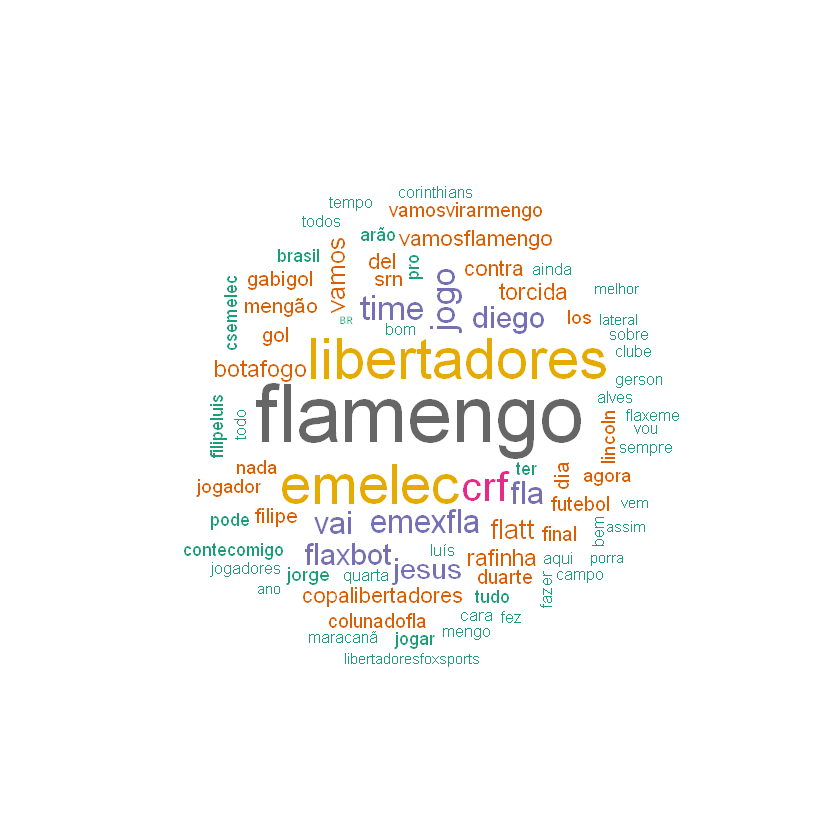

In [0]:
set.seed(1234)
wordcloud(words = d$word, freq = d$freq, min.freq = 0.1,
          max.words=80, random.order=FALSE, rot.per=0.1, 
          colors=brewer.pal(8, "Dark2"))
